In [6]:
import pandas as pd

In [31]:
DATADIR = r"C:\Users\MustaphaM\Desktop\sample-data-master\data\Sample_Game_1\Sample_Game_1_RawEventsData.csv"
DATADIR2 = r"C:\Users\MustaphaM\Desktop\sample-data-master\data\Sample_Game_2\Sample_Game_2_RawEventsData.csv"

In [32]:
event1 = pd.read_csv(DATADIR)
events = pd.read_csv(DATADIR2)

In [33]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [34]:
events.columns

Index(['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]',
       'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y',
       'End X', 'End Y'],
      dtype='object')

In [35]:
events["Type"].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [173]:
# a function that converts positions from Metrica units to meters (with origin at centre circle)

def to_metric_coordinates(data, field_dimen = (106., 68.), inplace = False):
    ''' 
    convert positions from Metrica units to meters (with origin at centre circle)
    '''
    new_data = data.copy()
    if inplace == True:
        x_columns = [c for c in data.columns if c[-1].lower()=="x"]
        y_columns = [c for c in data.columns if c[-1].lower()=="y"]
        data[x_columns]= (data[x_columns]-0.5)*field_dimen[0]
        data[y_columns]= (data[y_columns]-0.5)*field_dimen[1]
        return data
    else:
        x_columns = [c for c in new_data.columns if c[-1].lower()=="x"]
        y_columns = [c for c in new_data.columns if c[-1].lower()=="y"]
        new_data[x_columns]= (new_data[x_columns]-0.5)*field_dimen[0]
        new_data[y_columns]= (new_data[y_columns]-0.5)*field_dimen[1]
        return new_data
        

#conversion

to_metric_coordinates(events)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,-53.00,-34.00,-1176.60,12.24
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-839.52,-34.00,-727.16,-1328.72
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-390.08,-1467.44,-2187.84,-1051.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-2412.56,-866.32,-2749.64,335.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,396.44,1214.48,-2412.56,-1236.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-2187.84,-958.80,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-2075.48,-958.80,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-1850.76,-866.32,NaN,NaN


In [42]:
events = to_metric_coordinates(events)

In [43]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,0.00,-10.60,0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,0.00,-6.36,-19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,-21.08,-20.14,-14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,-12.24,-25.44,5.44


In [44]:
# events by team

home_events = events[events["Team"] == "Home"]
away_events = events[events["Team"] == "Away"]

## Events type and count by team

In [47]:
#event types and count of the home team
home_events["Type"].value_counts()

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

In [48]:
#event types and count of the away team

away_events["Type"].value_counts()

PASS              421
CHALLENGE         151
RECOVERY          113
BALL LOST         113
SET PIECE          46
BALL OUT           22
FAULT RECEIVED     11
SHOT               11
CARD                3
Name: Type, dtype: int64

## Shots by team

In [49]:
shots = events[events["Type"]=="SHOT"]
home_shots = home_events[home_events.Type == "SHOT"]
away_shots = away_events[away_events.Type == "SHOT"]

In [50]:
home_shots['Subtype'].value_counts()

HEAD-OFF TARGET-OUT    4
ON TARGET-SAVED        4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [51]:
away_shots["Subtype"].value_counts()

OFF TARGET-OUT         3
ON TARGET-SAVED        2
BLOCKED                2
ON TARGET-GOAL         2
HEAD-OFF TARGET-OUT    1
OFF TARGET-HEAD-OUT    1
Name: Subtype, dtype: int64

In [53]:
#number of shots, by whom?
home_shots["From"].value_counts()

Player9     4
Player10    3
Player5     2
Player7     1
Player12    1
Player3     1
Player4     1
Name: From, dtype: int64

## Goals by team

In [56]:
home_goals= home_shots[home_shots["Subtype"].str.contains("-GOAL")].copy()
away_goals = away_shots[away_shots["Subtype"].str.contains("-GOAL")].copy()

In [57]:
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,3.40,-54.06,2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,1.36,54.06,2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,5.44,54.06,2.72


## Plot Pitch

In [67]:
import matplotlib.pyplot as plt
import numpy as np

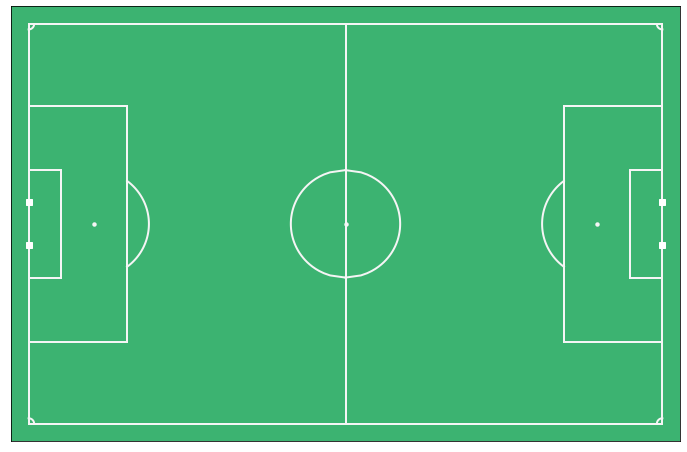

In [68]:
def plot_pitch( field_dimen = (106.0,68.0), field_color ='green', linewidth=2, markersize=20):
    """ plot_pitch
    
    Plots a soccer pitch. All distance units converted to meters.
    
    Parameters
    -----------
        field_dimen: (length, width) of field in meters. Default is (106,68)
        field_color: color of field. options are {'green','white'}
        linewidth  : width of lines. default = 2
        markersize : size of markers (e.g. penalty spot, centre spot, posts). default = 20
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)
    """
    fig,ax = plt.subplots(figsize=(12,8)) # create a figure 
    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color=='green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color=='white':
        lc = 'k'
        pc = 'k'
    # ALL DIMENSIONS IN m
    border_dimen = (3,3) # include a border arround of the field of width 3m
    meters_per_yard = 0.9144 # unit conversion from yards to meters
    half_pitch_length = field_dimen[0]/2. # length of half pitch
    half_pitch_width = field_dimen[1]/2. # width of half pitch
    signs = [-1,1] 
    # Soccer field dimensions typically defined in yards, so we need to convert to meters
    goal_line_width = 8*meters_per_yard
    box_width = 20*meters_per_yard
    box_length = 6*meters_per_yard
    area_width = 44*meters_per_yard
    area_length = 18*meters_per_yard
    penalty_spot = 12*meters_per_yard
    corner_radius = 1*meters_per_yard
    D_length = 8*meters_per_yard
    D_radius = 10*meters_per_yard
    D_pos = 12*meters_per_yard
    centre_circle_radius = 10*meters_per_yard
    # plot half way line # center circle
    ax.plot([0,0],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
    ax.scatter(0.0,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
    y = np.linspace(-1,1,50)*centre_circle_radius
    x = np.sqrt(centre_circle_radius**2-y**2)
    ax.plot(x,y,lc,linewidth=linewidth)
    ax.plot(-x,y,lc,linewidth=linewidth)
    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length,half_pitch_length],[s*half_pitch_width,s*half_pitch_width],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
        # goal posts & line
        ax.plot( [s*half_pitch_length,s*half_pitch_length],[-goal_line_width/2.,goal_line_width/2.],pc+'s',markersize=6*markersize/20.,linewidth=linewidth)
        # 6 yard box
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[box_width/2.,box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[-box_width/2.,-box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*box_length,s*half_pitch_length-s*box_length],[-box_width/2.,box_width/2.],lc,linewidth=linewidth)
        # penalty area
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[area_width/2.,area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[-area_width/2.,-area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*area_length,s*half_pitch_length-s*area_length],[-area_width/2.,area_width/2.],lc,linewidth=linewidth)
        # penalty spot
        ax.scatter(s*half_pitch_length-s*penalty_spot,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
        # corner flags
        y = np.linspace(0,1,50)*corner_radius
        x = np.sqrt(corner_radius**2-y**2)
        ax.plot(s*half_pitch_length-s*x,-half_pitch_width+y,lc,linewidth=linewidth)
        ax.plot(s*half_pitch_length-s*x,half_pitch_width-y,lc,linewidth=linewidth)
        # draw the D
        y = np.linspace(-1,1,50)*D_length # D_length is the chord of the circle that defines the D
        x = np.sqrt(D_radius**2-y**2)+D_pos
        ax.plot(s*half_pitch_length-s*x,y,lc,linewidth=linewidth)
        
    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # set axis limits
    xmax = field_dimen[0]/2. + border_dimen[0]
    ymax = field_dimen[1]/2. + border_dimen[1]
    ax.set_xlim([-xmax,xmax])
    ax.set_ylim([-ymax,ymax])
    ax.set_axisbelow(True)
    return fig,ax
fig,ax = plot_pitch()


## Plot shots

Text(-47.7, 3.400000000000003, '')

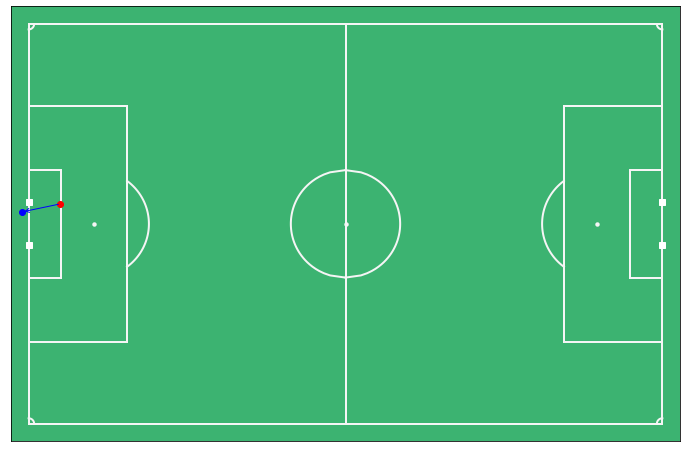

In [86]:
fig,ax = plot_pitch()
#on-target shot position
ax.plot( events.loc[198]["Start X"], events.loc[198]["Start Y"], "ro")

ax.plot( events.loc[198]["End X"], events.loc[198]["End Y"], "bo")


#on-target shot direction
ax.annotate("", xy = events.loc[198][["End X", "End Y"]], xytext = events.loc[198][["Start X", "Start Y"]],\
           alpha = 0.6, arrowprops = dict(arrowstyle = "->", color = "b"))


## Plotting all the passes
All the passes that led up to the goal

In [96]:
def plot_events( events, figax=None, field_dimen = (106.0,68), \
                indicators = ['Marker','Arrow'], color='r', \
                marker_style = 'o', alpha = 0.5, annotate=False):
    """ plot_events( events )
    
    Plots Metrica event positions on a football pitch. event data can be a single or 
    several rows of a data frame. All distances should be in meters.
    
    Parameters
    -----------
        events: row (i.e. instant) of the home team tracking data frame
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously 
        generated pitch. 
        Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot, 
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        indicators: List containing choices on how to plot the event.
        'Marker' places a marker at the 'Start X/Y' location of the event;
        'Arrow' draws an arrow from the start to end locations. Can choose one or both.
        color: color of indicator. Default is 'r' (red)
        marker_style: Marker type used to indicate the event position. Default is 'o' (filled circle).
        alpha: alpha of event marker. Default is 0.5    
        annotate: Boolean determining whether text annotation from event data 'Type' and 'From' fields is shown on plot. Default is False.
        
    Returns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)
    """

    if figax is None: # create new pitch 
        fig,ax = plot_pitch( field_dimen = field_dimen )
    else: # overlay on a previously generated pitch
        fig,ax = figax 
    for i,row in events.iterrows():
        if 'Marker' in indicators:
            ax.plot(  row['Start X'], row['Start Y'], color+marker_style, alpha=alpha )
        if 'Arrow' in indicators:
            ax.annotate("", xy=row[['End X','End Y']], xytext=row[['Start X','Start Y']],\
                        alpha=alpha, arrowprops=dict(alpha=alpha,width=0.5,headlength=4.0,\
                                                     headwidth=4.0,color=color),annotation_clip=False)
        if annotate:
            textstring = row['Type'] + ': ' + row['From']
            ax.text( row['Start X'], row['Start Y'], textstring, fontsize=10, color=color)
    return fig,ax

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x584d708d48>)

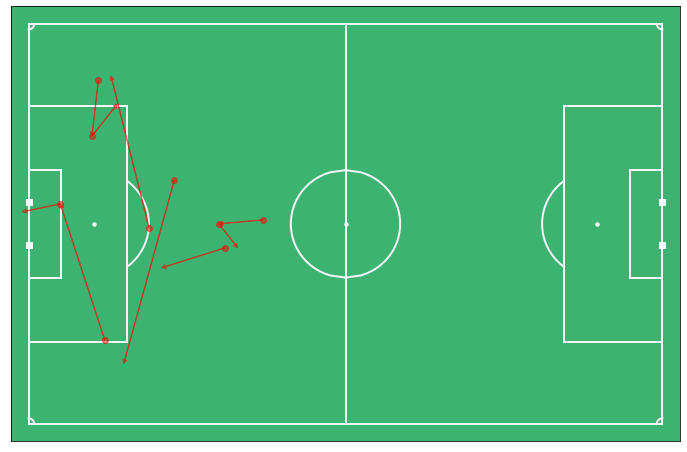

In [97]:
fig,ax = plot_pitch()
plot_events(events.loc[190:198], indicators = ["Marker","Arrow"], figax = (fig, ax))


## Annotating the Players and Event Type

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x584d8e8348>)

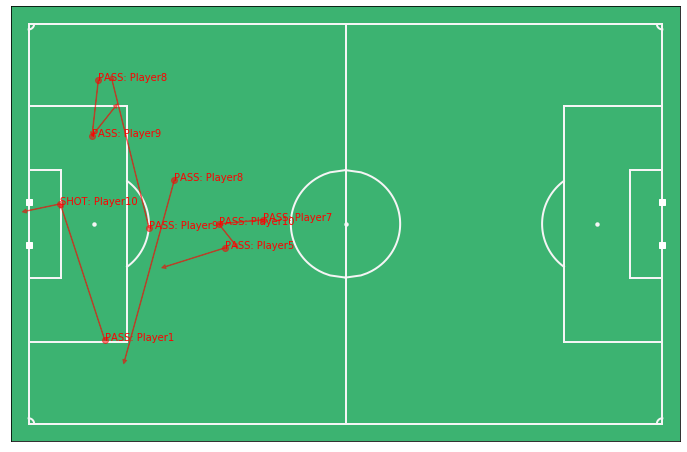

In [101]:
fig,ax = plot_pitch()
plot_events(events.loc[190:198], indicators = ["Marker","Arrow"], figax = (fig, ax), annotate = True)

## Reading in the Tracking data

In [128]:
 DataDir= r"C:\Users\MustaphaM\Desktop\sample-data-master\data"
tracking_away = pd.read_csv(AwayT_dir)
tracking_home = pd.read_csv(HomeT_dir)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [129]:
tracking_away.shape

(141158, 29)

In [130]:
tracking_home.shape

(141158, 33)

In [133]:
tracking_home

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Home,Unnamed: 4,Home.1,Unnamed: 6,Home.2,Unnamed: 8,Home.3,...,Home.10,Unnamed: 24,Home.11,Unnamed: 26,Home.12,Unnamed: 28,Home.13,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,11,NaN,1,NaN,2,NaN,3,...,10,NaN,12,NaN,13,NaN,14,NaN,NaN,NaN
1,Period,Frame,Time [s],Player11,NaN,Player1,NaN,Player2,NaN,Player3,...,Player10,NaN,Player12,NaN,Player13,NaN,Player14,NaN,Ball,NaN
2,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141153,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141154,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141155,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN
141156,2,141155,5646.2,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51028,0.94792,0.28059,0.36706,NaN,NaN


## Function to read in the Data as needed

In [117]:
import csv
def tracking_data(DATADIR,game_id,teamname):
    '''
    tracking_data(DATADIR,game_id,teamname):
    read Metrica tracking data for game_id and return as a DataFrame. 
    teamname is the name of the team in the filename. For the sample data this is either 'Home' or 'Away'.
    '''
    teamfile = '/Sample_Game_%d/Sample_Game_%d_RawTrackingData_%s_Team.csv' % (game_id,game_id,teamname)
    # First:  deal with file headers so that we can get the player names correct
    csvfile =  open('{}/{}'.format(DATADIR, teamfile), 'r') # create a csv file reader
    reader = csv.reader(csvfile) 
    teamnamefull = next(reader)[3].lower()
    print("Reading team: %s" % teamnamefull)
    # construct column names
    jerseys = [x for x in next(reader) if x != ''] # extract player jersey numbers from second row
    columns = next(reader)
    for i, j in enumerate(jerseys): # create x & y position column headers for each player
        columns[i*2+3] = "{}_{}_x".format(teamname, j)
        columns[i*2+4] = "{}_{}_y".format(teamname, j)
    columns[-2] = "ball_x" # column headers for the x & y positions of the ball
    columns[-1] = "ball_y"
    # Second: read in tracking data and place into pandas Dataframe
    tracking = pd.read_csv('{}/{}'.format(DATADIR, teamfile), names=columns, index_col='Frame', skiprows=3)
    return tracking

## Invoking the Function and reading in the data

In [161]:
tracking_Home = tracking_data(DataDir, 2, "Home")
tracking_Away = tracking_data(DataDir,2,"Away")


Reading team: home
Reading team: away


In [162]:
tracking_Home.shape

(141156, 32)

In [163]:
tracking_Away.shape

(141156, 28)

In [164]:
tracking_Home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


x and y represents the positions of the different players. Substitute players 12 through 14 have no positions.
The ball has no position until the start of the game i.e. frame 51

In [165]:
tracking_Home.loc[51][["ball_x", "ball_y"]]

ball_x    0.50216
ball_y    0.50376
Name: 51, dtype: float64

## Convert Pitch Coordinates to metres and origin to centre


In [175]:

tracking_Home = to_metric_coordinates(tracking_Home)
tracking_Away = to_metric_coordinates(tracking_Away)

tracking_Home = tracking_Home
tracking_Away = tracking_Away


In [176]:
tracking_Home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,0.28084,15.70072,-14.5486,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,0.28084,15.70072,-14.5486,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,0.28084,15.70072,-14.5486,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,0.28084,15.70072,-14.5486,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,0.28084,15.70072,-14.5486,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting the Tracking data

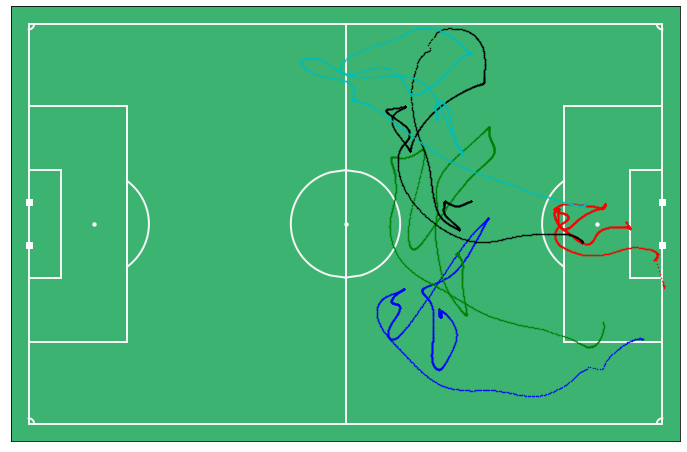

In [178]:
fig, ax = plot_pitch()

#we can plot the players trajectories over time using their start and end positions.
# E.g the first 60s implies 1500 frames (25 frames per second)
#overlaying the trajectories on the pitch
ax.plot(tracking_Home["Home_11_x"].iloc[:1500], tracking_Home["Home_11_y"].iloc[:1500], "r.", MarkerSize = 1)
ax.plot(tracking_Home["Home_1_x"].iloc[:1500], tracking_Home["Home_1_y"].iloc[:1500], "b.", MarkerSize = 1)
ax.plot(tracking_Home["Home_2_x"].iloc[:1500], tracking_Home["Home_2_y"].iloc[:1500], "g.", MarkerSize = 1)
ax.plot(tracking_Home["Home_3_x"].iloc[:1500], tracking_Home["Home_3_y"].iloc[:1500], "k.", MarkerSize = 1)
ax.plot(tracking_Home["Home_4_x"].iloc[:1500], tracking_Home["Home_4_y"].iloc[:1500], "c.", MarkerSize = 1)


The red line shows the movement of the goalkeeper. i.e player 11

## Plotting the positions at kick off

In [179]:
def plot_frame( hometeam, awayteam, figax=None, team_colors=('r','b'), field_dimen = (106.0,68.0), include_player_velocities=False, PlayerMarkerSize=10, PlayerAlpha=0.7, annotate=False ):
    """ plot_frame( hometeam, awayteam )
    
    Plots a frame of Metrica tracking data (player positions and the ball) on a football pitch. All distances should be in meters.
    
    Parameters
    -----------
        hometeam: row (i.e. instant) of the home team tracking data frame
        awayteam: row of the away team tracking data frame
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot, 
        team_colors: Tuple containing the team colors of the home & away team. Default is 'r' (red, home team) and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7
        annotate: Boolean variable that determines with player jersey numbers are added to the plot (default is False)
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)
    """
    if figax is None: # create new pitch 
        fig,ax = plot_pitch( field_dimen = field_dimen )
    else: # overlay on a previously generated pitch
        fig,ax = figax # unpack tuple
    # plot home & away teams in order
    for team,color in zip( [hometeam,awayteam], team_colors) :
        x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # column header for player x positions
        y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # column header for player y positions
        ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
        if include_player_velocities:
            vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
            vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
            ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
        if annotate:
            [ ax.text( team[x]+0.5, team[y]+0.5, x.split('_')[1], fontsize=10, color=color  ) for x,y in zip(x_columns,y_columns) if not ( np.isnan(team[x]) or np.isnan(team[y]) ) ] 
    # plot ball
    ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
    return fig,ax

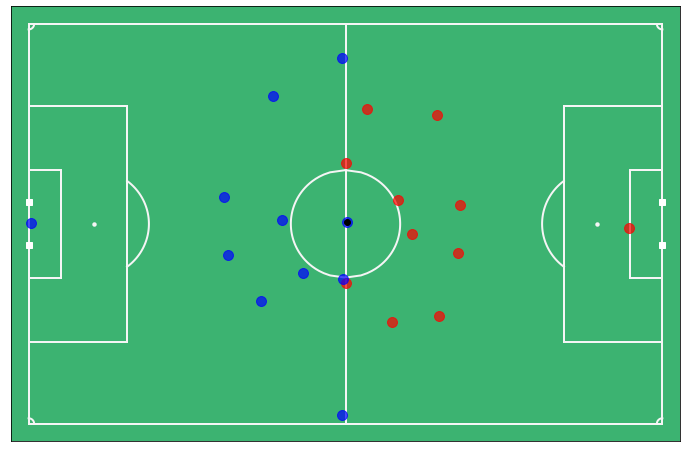

In [183]:
#plotting the positions at kick off
fig, ax = plot_frame(tracking_Home.loc[51], tracking_Away.loc[51])

The black marker shows the position of the ball at kick off\
As evident in the event data, it is the away team that kicks off (blue)

## Plotting the positions at goal

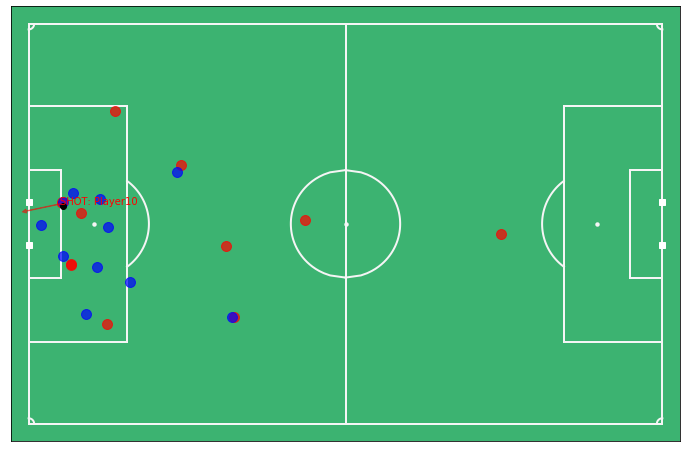

In [190]:
fig, ax = plot_events(events.loc[198:198], indicators = ["Marker", "Arrow"], annotate = True)
frame = events.loc[198]["Start Frame"]
fig, ax = plot_frame(tracking_Home.loc[frame], tracking_Away.loc[frame], figax = (fig,ax))